1. Importing Packages and Loading Data

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df_googleapp = pd.read_csv("googleplaystore.csv")
df_googleapp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df_googleapp.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [21]:
df_googleapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [22]:
#Printing the shape of the Dataframe
print(df_googleapp.shape)

(10841, 13)


In [23]:
print(df_googleapp.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [24]:
df_googleapp['App'].nunique()

9660

In [25]:
df_googleapp['Category'].unique()
# I predict that there should be an error with '1.9', which is not actual category.

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

*I predict that there should be an error with '1.9', which is not actual category.

2. Data Preparation and Data Cleaning

2.1. Handling Missing Values

In [26]:
#Finding missing values in the dataset
df_googleapp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [27]:
#Dropping null values from the dataset
df_googleapp = df_googleapp.dropna()
#Sum of missing values after removal 
print(df_googleapp.isnull().sum()) 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


2.2. Handling Duplicate Values

In [28]:
#Finding duplicate rows in the dataframe and then remove duplicate rows.
df_duplicate = df_googleapp[df_googleapp.duplicated()]
print("number of duplicate rows: {}".format(df_duplicate.shape))
df_googleapp = df_googleapp.drop_duplicates()

number of duplicate rows: (474, 13)


In [29]:
df_googleapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


2.3. Data Type Conversion  

In [30]:
#Converting Installs column to numeric variable 
df_googleapp['Installs']=df_googleapp['Installs'].str.replace(',','').str.replace('+','').astype('int')

C:\Users\y\AppData\Local\Temp\ipykernel_3944\2451459904.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_googleapp['Installs']=df_googleapp['Installs'].str.replace(',','').str.replace('+','').astype('int')


In [31]:
#Converting Reviews column to numeric variable 
df_googleapp['Reviews']=df_googleapp['Reviews'].astype('int')

In [32]:
#Converting Price column to numeric variable 
df_googleapp['Price']=df_googleapp['Price'].str.replace('$','').astype('float')

C:\Users\y\AppData\Local\Temp\ipykernel_3944\2837852182.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_googleapp['Price']=df_googleapp['Price'].str.replace('$','').astype('float')


In [33]:
#Checking statistics for coloumns of the float64 data type
df_googleapp.describe(include=['float64'])

,Rating,Price
count,8886.000000,8886.000000
mean,4.187959,0.963526
std,0.522428,16.194792
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


In [34]:
df_googleapp.describe(include=['int'])

,Reviews,Installs
count,8.886000e+03,8.886000e+03
mean,4.730928e+05,1.650061e+07
std,2.906007e+06,8.640413e+07
min,1.000000e+00,1.000000e+00
25%,1.640000e+02,1.000000e+04
50%,4.723000e+03,5.000000e+05
75%,7.131325e+04,5.000000e+06
max,7.815831e+07,1.000000e+09


In [35]:
#Checking statistics for coloumns of the object data type
df_googleapp.describe(include=['object'])

,App,Category,Size,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8886,8886,8886,8886,8886,8886,8886,8886,8886
unique,8190,33,413,2,6,115,1299,2638,31
top,ROBLOX,FAMILY,Varies with device,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1717,1468,8275,7089,732,291,1258,1987


2.4. Handling Outliers

In [36]:
#Checking the final list of columns after dropping unamed and custid
print(df_googleapp.columns)
print("Shape of dataframe before removing outliers: {}".format(df_googleapp.shape))

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Shape of dataframe before removing outliers: (8886, 13)


<AxesSubplot:xlabel='Rating'>

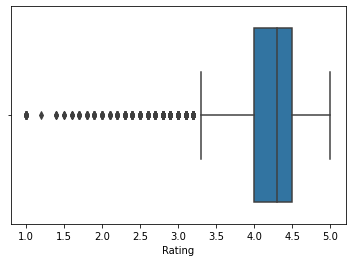

In [37]:
#Checking outliers for Rating 
sns.boxplot(x=df_googleapp['Rating'])

In [38]:
#Defining Quartiles for removal of outliers
Q1 = df_googleapp['Rating'].quantile(0.25) 
Q3 = df_googleapp['Rating'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR): difference between teh 75th and 25th pecentiles.
total_outlier_num = ((df_googleapp['Rating'] < (Q1 - 1.5 * IQR)) | (df_googleapp['Rating'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in Rating: {}".format(total_outlier_num))

Total Number of Outliers in Rating: 494


In [39]:
# Application that has the highest rating
df_googleapp[df_googleapp['Rating'] == df_googleapp['Rating'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24M,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [40]:
#Particularly, this application (10474) seems to have an error with category (shown as '1.9'), which also causes errors with rating, reviews and other variables. 
#Hence, will drop this row to remove outlier and errors. 
df_googleapp = df_googleapp.drop(labels= 10474, axis=0)

In [41]:
#Now, there is no outlier, which is caused by mistake and error, in Rating
df_googleapp.describe(include=['float64'])
# Category '1.9' has been removed.
df_googleapp['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

*Now, there is no '1.9' category, which was an error.

Total Number of Outliers in Reviews: 1555


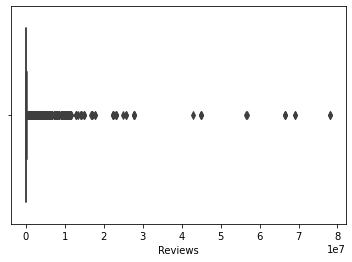

In [42]:
#Checking outliers for Reviews 
sns.boxplot(x=df_googleapp['Reviews'])
#Defining Quartiles and check if outliers should be removed. 
Q1 = df_googleapp['Reviews'].quantile(0.25) 
Q3 = df_googleapp['Reviews'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR): difference between teh 75th and 25th pecentiles.
total_outlier_num = ((df_googleapp['Reviews'] < (Q1 - 1.5 * IQR)) | (df_googleapp['Reviews'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in Reviews: {}".format(total_outlier_num))
#Although there are many outliers in Reviews, they are not caused by measurement errors and hence "true outliers" 

Total Number of Outliers in Price: 611


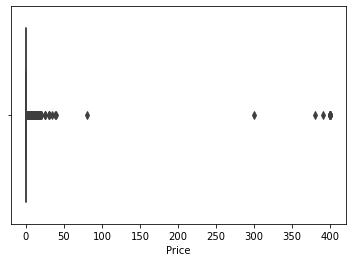

In [43]:
sns.boxplot(x=df_googleapp['Price'])
Q1 = df_googleapp['Price'].quantile(0.25) 
Q3 = df_googleapp['Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR): difference between teh 75th and 25th pecentiles.
total_outlier_num = ((df_googleapp['Price'] < (Q1 - 1.5 * IQR)) | (df_googleapp['Price'] > (Q3 + 1.5 * IQR))).sum()
print("Total Number of Outliers in Price: {}".format(total_outlier_num))
#Same as Reviews. While most of applications are $0 (free), there are few applications, which are not free and should be paid.
#They are true outliers and therefore left in dataset.

<AxesSubplot:xlabel='Installs'>

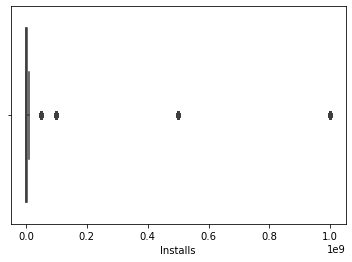

In [44]:
sns.boxplot(x=df_googleapp['Installs'])
#Same for Install. They are all true outliers and not related with measurement errors. 

2.5. Removal of Unnecessary Columns

In [45]:
#Some coloumns are not related or necessary in our data analysis, including Genres, Current Ver, Android Ver. Hence, those columns will be dropped. 
remove= ['Genres', 'Current Ver', 'Android Ver', 'Last Updated']
df_googleapp.drop(remove, inplace = True, axis =1)
df_googleapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8885 non-null   object 
 1   Category        8885 non-null   object 
 2   Rating          8885 non-null   float64
 3   Reviews         8885 non-null   int32  
 4   Size            8885 non-null   object 
 5   Installs        8885 non-null   int32  
 6   Type            8885 non-null   object 
 7   Price           8885 non-null   float64
 8   Content Rating  8885 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 624.7+ KB


3. Data Visualisation Using Various Plots

3.1. The Number of Applications for each Category

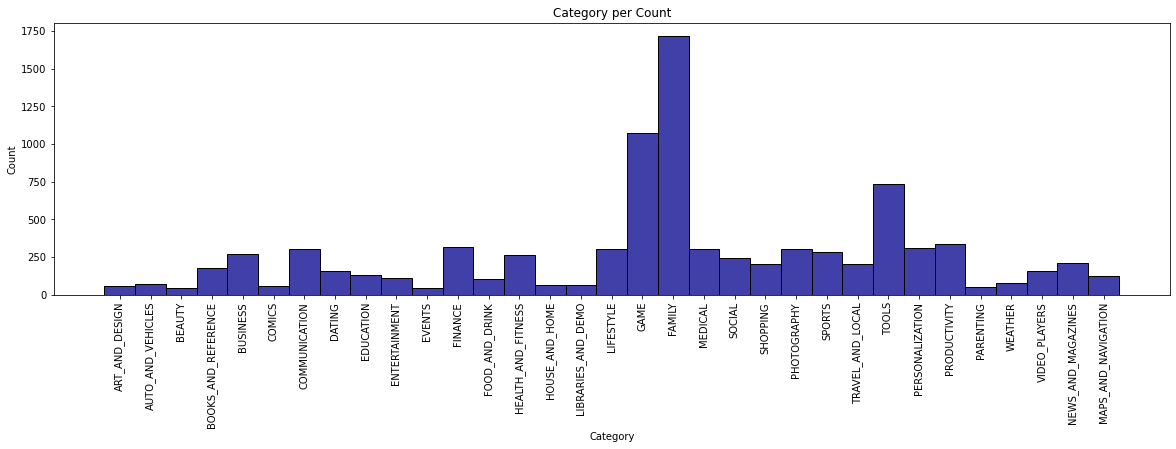

Value count for each category: FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           306
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


In [46]:
#Data Visualisation using various plots 
#Population per each category
plt.figure(figsize=(20, 5))
His = sns.histplot(x=df_googleapp['Category'], color='darkblue')
plt.title('Category per Count')
plt.xticks(rotation=90)
plt.show()
print("Value count for each category: {}".format(df_googleapp['Category'].value_counts()))
#Family has the most apllications within Category

3.2. Distribution of Rating

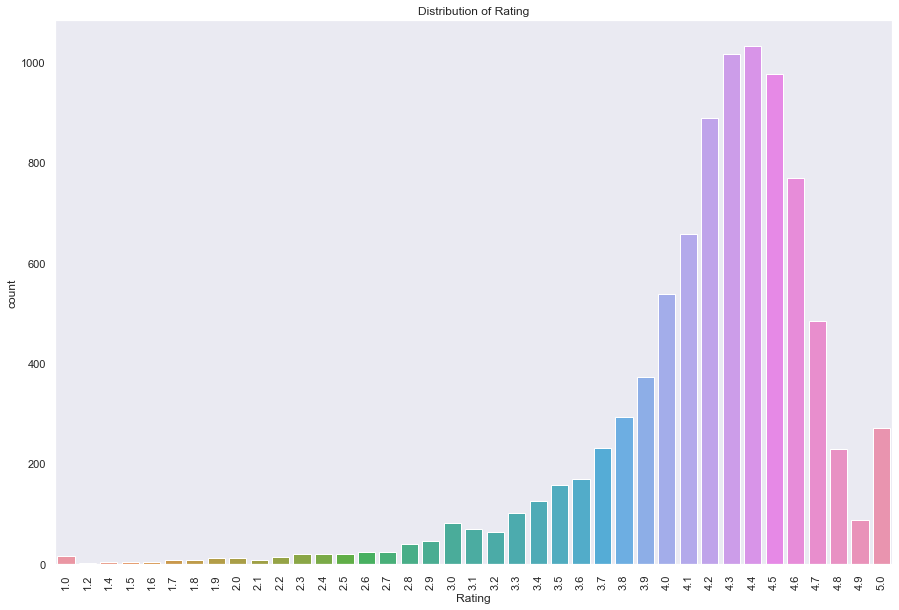

In [47]:
#Distribution of Rating
plt.figure(figsize=(15,10))
sns.set_theme(style="dark")
plt.xticks(rotation=90)
plt.title("Distribution of Rating")
ax = sns.countplot(data=df_googleapp, x="Rating")


3.3. Distribution of Reviews

C:\Users\y\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\y\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


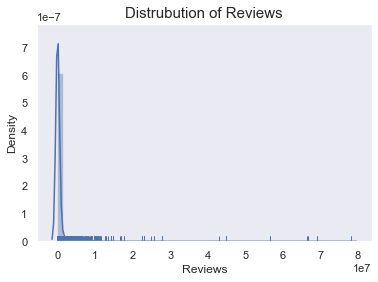

In [48]:
#Distribution of Reviews
sns.distplot(df_googleapp['Reviews'], rug=True)
plt.title('Distrubution of Reviews', size=15);

3.4. Distribution of Applications that are Either Free or Paid

Value count for each type: Free    8274
Paid     611
Name: Type, dtype: int64


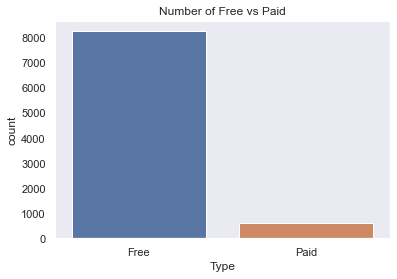

In [49]:
#Distributions of applications that are either free or paid
sns.countplot(data=df_googleapp, x='Type')
plt.title('Number of Free vs Paid')
print("Value count for each type: {}".format(df_googleapp['Type'].value_counts()))

3.5. Distribution of Content Rating

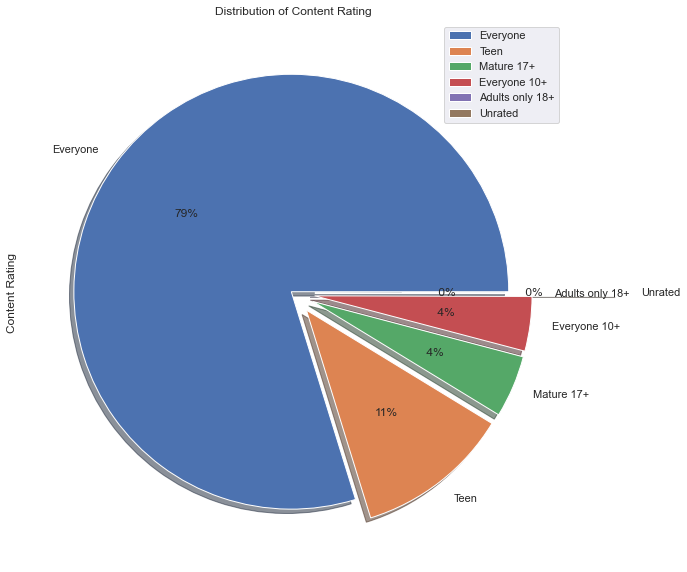

Value count for each content rating: Everyone           7088
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


In [50]:
#Distribution of Content Rating 
plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
df_googleapp['Content Rating'].value_counts().plot(kind='pie',autopct="%2i%%",shadow=True, explode=explode)
plt.title('Distribution of Content Rating')
plt.legend()
plt.show()
print("Value count for each content rating: {}".format(df_googleapp['Content Rating'].value_counts()))

3.6. The Number of Installations for Categories

In [51]:
#The number of installations per each category 
df_googleapp.groupby("Category").Installs.agg(["min", "max", "mean", "median"])

,min,max,mean,median
Category,,,,
ART_AND_DESIGN,100,50000000,2.036526e+06,100000.0
AUTO_AND_VEHICLES,100,10000000,7.278055e+05,100000.0
BEAUTY,100,10000000,6.408619e+05,100000.0
BOOKS_AND_REFERENCE,5,1000000000,1.082651e+07,100000.0
BUSINESS,5,100000000,3.198215e+06,10000.0
COMICS,100,10000000,9.661397e+05,100000.0
COMMUNICATION,10,1000000000,7.892889e+07,1000000.0
DATING,10,10000000,1.298883e+06,100000.0
EDUCATION,1000,100000000,4.138388e+06,1000000.0


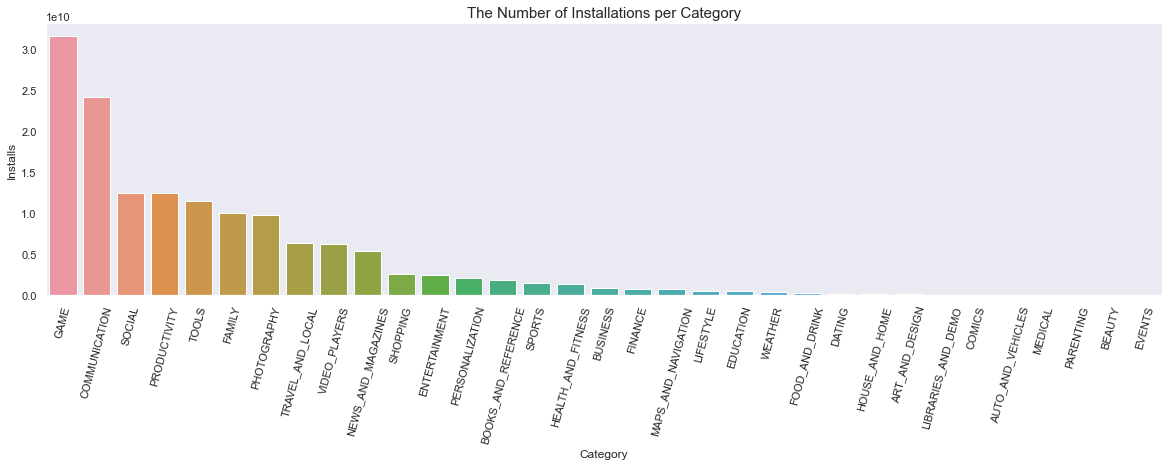

In [52]:
catg_int = df_googleapp.groupby('Category')['Installs'].sum()
catg_int = pd.DataFrame(catg_int).reset_index()
plt.figure(figsize=(20, 5))
order = df_googleapp.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).index
sns.barplot(data=catg_int, x='Category', y='Installs', order=order)
plt.title('The Number of Installations per Category', size = 15)
plt.xticks(rotation=75);

Observation: Game and Communication are the most popular categories based on the number of installs, but in order to confirm, need to look into other variables.

3.7. The Distribution of Reviews for Categories

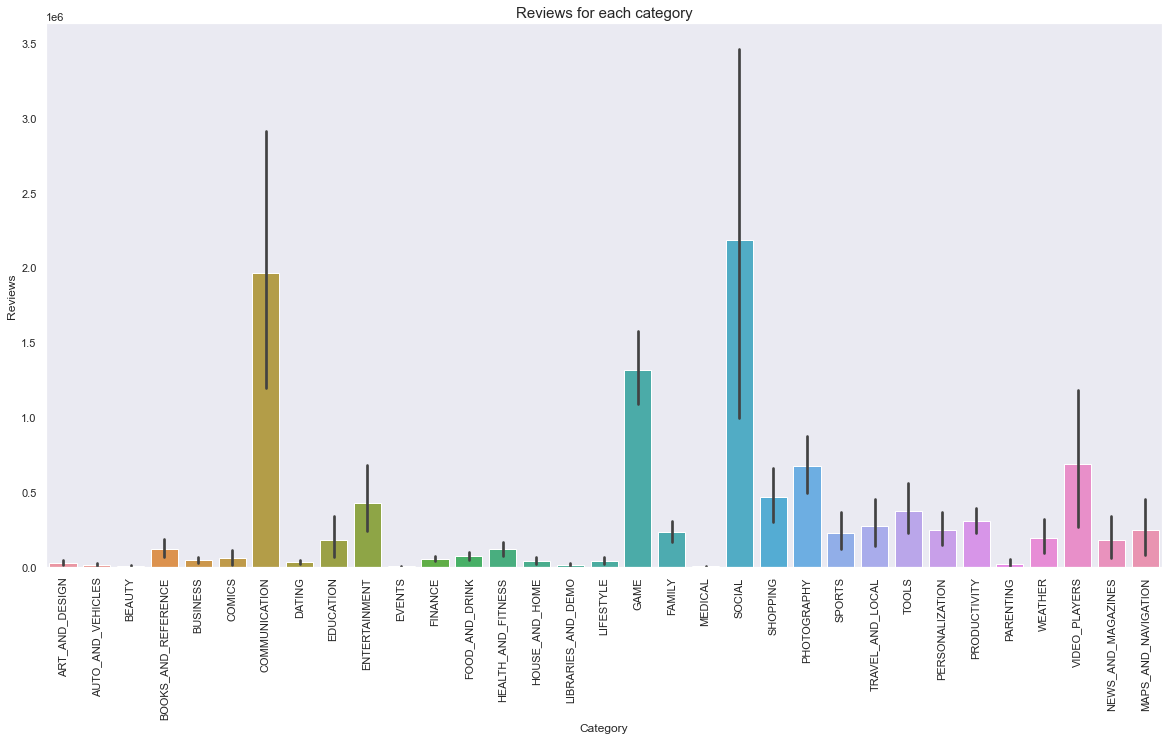

In [53]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_googleapp, x='Category', y='Reviews')
plt.title('Reviews for each category', size = 15)
plt.xticks(rotation=90);
#Communication, Social and Game are top three categories that have the most reviews. 

Observation: top three most reviewed categories are Social, Communication and Game.

3.8. Top 18 Most Reviewed Applications 

Text(0.5, 1.0, 'Most Reviewed Applications in Googlestore')

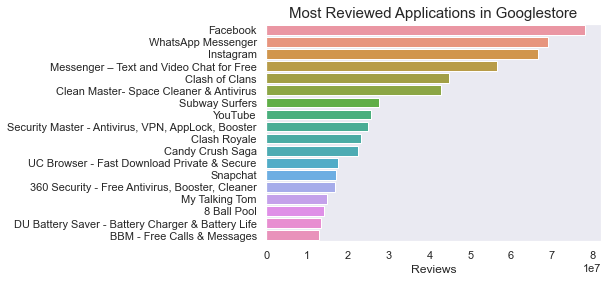

In [54]:
#Let's look into each category to find the most popular application in each category. 
Review_tops = df_googleapp.sort_values(['Reviews'],ascending = 0 )[:50]
ax = sns.barplot(data= Review_tops, x = 'Reviews' , y = 'App')
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Reviewed Applications in Googlestore", size = 15)

Observation: Most of those applications belong to either Game, Communication or Social category.

3.9. The Correlation between Rating and Type

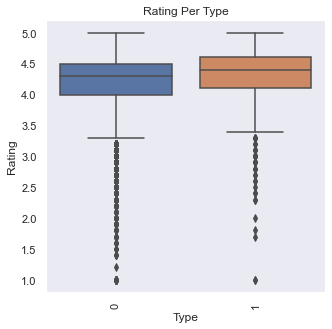

In [61]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_googleapp, x='Type', y='Rating')
plt.title('Rating Per Type')
plt.xticks(rotation=90);

Observation: There is a slightly higher ratings in paid applications than free aplications.

3.10. Correlation Between Reviews and Rating

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

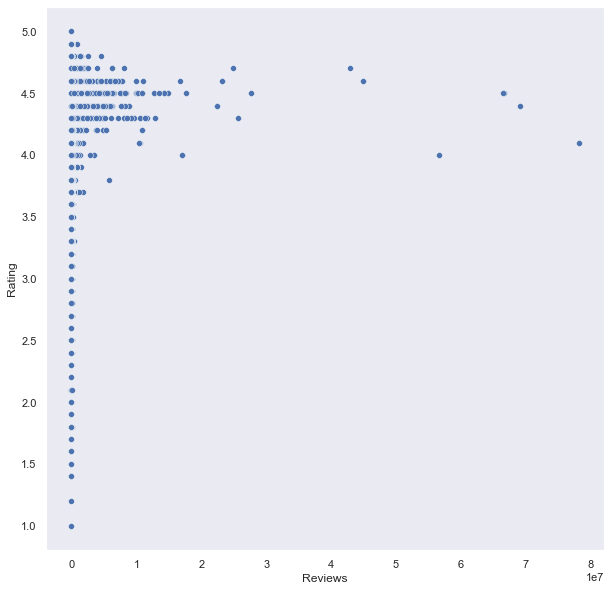

In [55]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_googleapp, x='Reviews', y='Rating')

Observation : The scatterplot shows that there is a strong correlation between higher ratings and popular apps. 

3.11. Correlation Between Reviews and Installs

<AxesSubplot:xlabel='Reviews', ylabel='Installs'>

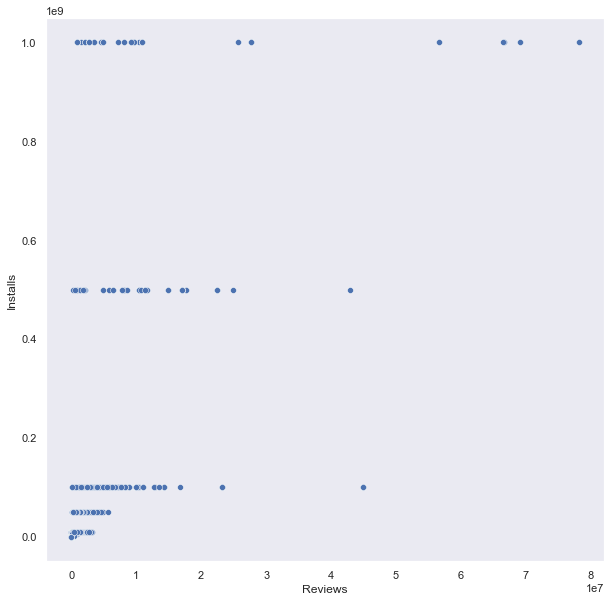

In [56]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_googleapp, x='Reviews', y='Installs')

Observation: Also, we can see that lower number of reviews is related to lower number of installs. Thus, installs and reviews have a strong correlation.

3.12. Correlations between numeric variables (Heatmap)

Observation: Heatmap confirms that there are Strong correlationS between Reviews and Rating and Reviews and Installs. Also, there is a correlation between Rating and Installs as well.

3.13. Pairwise relationships between Variables

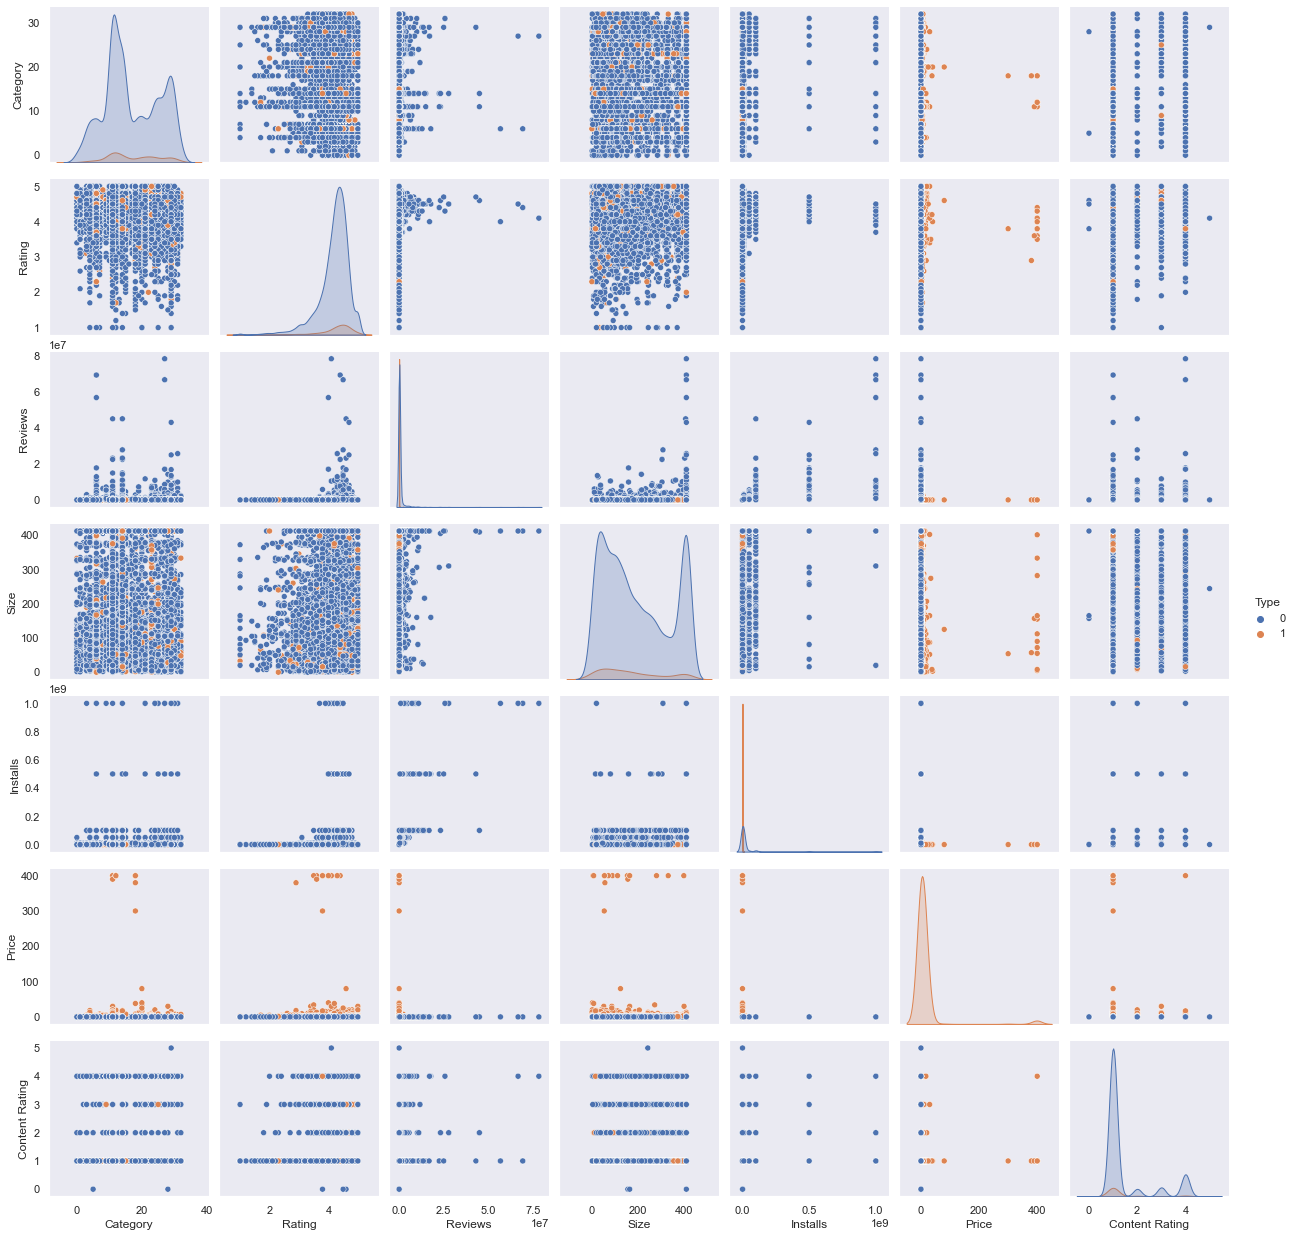

In [58]:
#Finally, pairplot allows to check the pairwise relationships between variables.
#The categorical data has to be converted into their respective category codings
for x in ['Category', 'Size', 'Type', 'Content Rating']:
    df_googleapp[x] = df_googleapp[x].astype('category')

cat_columns = df_googleapp.select_dtypes(['category']).columns #Selecting all category columns
df_googleapp[cat_columns] = df_googleapp[cat_columns].apply(lambda x: x.cat.codes) #Replacing the existing columns with category

sns.pairplot(df_googleapp, hue='Type')